## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [17]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model

In [18]:
"""Code Here
設定超參數
"""
LEARNNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =256
MOMENTUM = 0.95
Dropout_EXP = [0.25, 0.55, 0.95]

In [20]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""

for drp_ratio in Dropout_EXP:
    keras.backend.clear_session()
    print("Experiment with Dropout_ratio = %.6f"%(drp_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp_ratio)
    model.summary()
    
    optimizer = keras.optimizers.Adam(lr=LEARNNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train,
                 epochs=EPOCHS,
                 batch_size=BATCH_SIZE,
                 validation_data=(x_test, y_test),
                 shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-drp-%s"%(drp_ratio)
    results[exp_name_tag] = {"train-loss" : train_loss,
                                         "valid-loss" : valid_loss,
                                         "train-acc" : train_acc,
                                         "valid-acc" : valid_acc}

Experiment with Dropout_ratio = 0.250000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None,

Epoch 32/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5163 - acc: 0.4552 - val_loss: 1.5020 - val_acc: 0.4669
Epoch 33/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5152 - acc: 0.4559 - val_loss: 1.4803 - val_acc: 0.4821
Epoch 34/50
50000/50000 [==============================] - 7s 136us/step - loss: 1.5133 - acc: 0.4540 - val_loss: 1.4854 - val_acc: 0.4751
Epoch 35/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5157 - acc: 0.4537 - val_loss: 1.4676 - val_acc: 0.4843TA: 2s - lo - ETA: 1s - loss: 1.5173 - acc:  - ETA: 0s - loss: 1.5162 - acc: 0.45 - ETA: 0s - loss: 1.5161 - ac
Epoch 36/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.5087 - acc: 0.4579 - val_loss: 1.4707 - val_acc: 0.4735
Epoch 37/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.5026 - acc: 0.4617 - val_loss: 1.4717 - val_acc: 0.4794.5020 - acc: 0
Epoch 38/50
50000/50000 [================

50000/50000 [==============================] - 7s 140us/step - loss: 2.0851 - acc: 0.1993 - val_loss: 2.1152 - val_acc: 0.1967
Epoch 26/50
50000/50000 [==============================] - 7s 133us/step - loss: 2.0877 - acc: 0.1947 - val_loss: 2.2080 - val_acc: 0.1718
Epoch 27/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0817 - acc: 0.1998 - val_loss: 2.1364 - val_acc: 0.1919
Epoch 28/50
50000/50000 [==============================] - 7s 135us/step - loss: 2.0760 - acc: 0.2027 - val_loss: 2.1661 - val_acc: 0.1869
Epoch 29/50
50000/50000 [==============================] - 7s 134us/step - loss: 2.0800 - acc: 0.2010 - val_loss: 2.2311 - val_acc: 0.1681
Epoch 30/50
50000/50000 [==============================] - 8s 151us/step - loss: 2.0777 - acc: 0.2038 - val_loss: 2.1890 - val_acc: 0.1880
Epoch 31/50
50000/50000 [==============================] - 7s 140us/step - loss: 2.0842 - acc: 0.1969 - val_loss: 2.1617 - val_acc: 0.1806
Epoch 32/50
50000/50000 [==============

Epoch 20/50
50000/50000 [==============================] - 6s 127us/step - loss: 3.3923 - acc: 0.0972 - val_loss: 4.7593 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 6s 129us/step - loss: 3.3590 - acc: 0.0978 - val_loss: 4.7205 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 6s 129us/step - loss: 3.3755 - acc: 0.0996 - val_loss: 4.3745 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 7s 131us/step - loss: 3.3602 - acc: 0.0972 - val_loss: 4.5242 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 6s 130us/step - loss: 3.3901 - acc: 0.1001 - val_loss: 4.1784 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 7s 131us/step - loss: 3.3565 - acc: 0.0977 - val_loss: 3.9669 - val_acc: 0.1000
Epoch 26/50
50000/50000 [==============================] - 7s 132us/step - loss: 3.3416 - acc: 0.0966 - val_loss: 4.4240 - val_acc: 0.1000
Epoch 27/50
50000/50000 [==

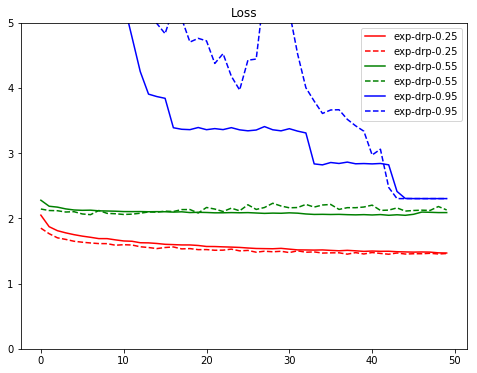

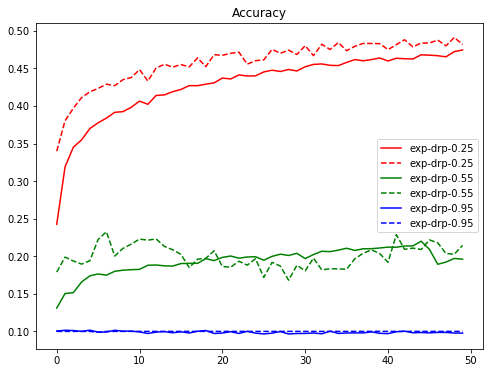

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8, 6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], "--", label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-acc"])), results[cond]["train-acc"], "-", label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-acc"])), results[cond]["valid-acc"], "--", label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()